In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

In [3]:
## 엑셀파일 불러오기

df

,환자,거주지,추정 감염경로,확진일,격리시설/퇴원일
0,울산#145,남구,확진자(#144) 접촉,2020-09-22,울산대학교병원
1,울산#144,남구,확진자(부산#312) 접촉,2020-09-22,울산대학교병원
2,울산#143,중구,확진자(포항#70) 접촉,2020-09-21,울산대학교병원
3,울산#142,남구,조사 중,2020-09-19,울산대학교병원
4,울산#141,울주군,확진자(#95) 접촉,2020-09-12,울산대학교병원
...,...,...,...,...,...
140,울산#5,남구,신천지 예배 참석,2020-02-26,퇴원(3/10)
141,울산#4,동구,확진자(경북 경산) 접촉,2020-02-25,퇴원(4/6)
142,울산#3,중구,신천지 예배 참석,2020-02-25,퇴원(3/14)
143,울산#2,중구,신천지 예배 참석,2020-02-24,퇴원(3/17)


In [4]:
## 데이터 프레임 정보 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   환자        145 non-null    object        
 1   거주지       145 non-null    object        
 2   추정 감염경로   145 non-null    object        
 3   확진일       145 non-null    datetime64[ns]
 4   격리시설/퇴원일  145 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.8+ KB


In [5]:
##  열이름 변경

df

,환자,거주지,경로,확진일,현재상태
0,울산#145,남구,확진자(#144) 접촉,2020-09-22,울산대학교병원
1,울산#144,남구,확진자(부산#312) 접촉,2020-09-22,울산대학교병원
2,울산#143,중구,확진자(포항#70) 접촉,2020-09-21,울산대학교병원
3,울산#142,남구,조사 중,2020-09-19,울산대학교병원
4,울산#141,울주군,확진자(#95) 접촉,2020-09-12,울산대학교병원
...,...,...,...,...,...
140,울산#5,남구,신천지 예배 참석,2020-02-26,퇴원(3/10)
141,울산#4,동구,확진자(경북 경산) 접촉,2020-02-25,퇴원(4/6)
142,울산#3,중구,신천지 예배 참석,2020-02-25,퇴원(3/14)
143,울산#2,중구,신천지 예배 참석,2020-02-24,퇴원(3/17)


In [6]:
## 환자열에서 번호만 남기기 

df

,환자,거주지,경로,확진일,현재상태
0,145,남구,확진자(#144) 접촉,2020-09-22,울산대학교병원
1,144,남구,확진자(부산#312) 접촉,2020-09-22,울산대학교병원
2,143,중구,확진자(포항#70) 접촉,2020-09-21,울산대학교병원
3,142,남구,조사 중,2020-09-19,울산대학교병원
4,141,울주군,확진자(#95) 접촉,2020-09-12,울산대학교병원
...,...,...,...,...,...
140,5,남구,신천지 예배 참석,2020-02-26,퇴원(3/10)
141,4,동구,확진자(경북 경산) 접촉,2020-02-25,퇴원(4/6)
142,3,중구,신천지 예배 참석,2020-02-25,퇴원(3/14)
143,2,중구,신천지 예배 참석,2020-02-24,퇴원(3/17)


In [7]:
## 현재상태 열에서 '(일자)' 생략한 퇴원 여부로만 변경

df

,환자,거주지,경로,확진일,현재상태
0,145,남구,확진자(#144) 접촉,2020-09-22,울산대학교병원
1,144,남구,확진자(부산#312) 접촉,2020-09-22,울산대학교병원
2,143,중구,확진자(포항#70) 접촉,2020-09-21,울산대학교병원
3,142,남구,조사 중,2020-09-19,울산대학교병원
4,141,울주군,확진자(#95) 접촉,2020-09-12,울산대학교병원
...,...,...,...,...,...
140,5,남구,신천지 예배 참석,2020-02-26,퇴원
141,4,동구,확진자(경북 경산) 접촉,2020-02-25,퇴원
142,3,중구,신천지 예배 참석,2020-02-25,퇴원
143,2,중구,신천지 예배 참석,2020-02-24,퇴원


In [8]:
## 확진일에 따른 환자수를 카운터한 시리즈 생성 후 확진일 기준 정렬

bydate

확진일
2020-02-22    1
2020-02-24    1
2020-02-25    2
2020-02-26    1
2020-02-27    6
             ..
2020-09-11    2
2020-09-12    7
2020-09-19    1
2020-09-21    1
2020-09-22    2
Name: count, Length: 62, dtype: int64

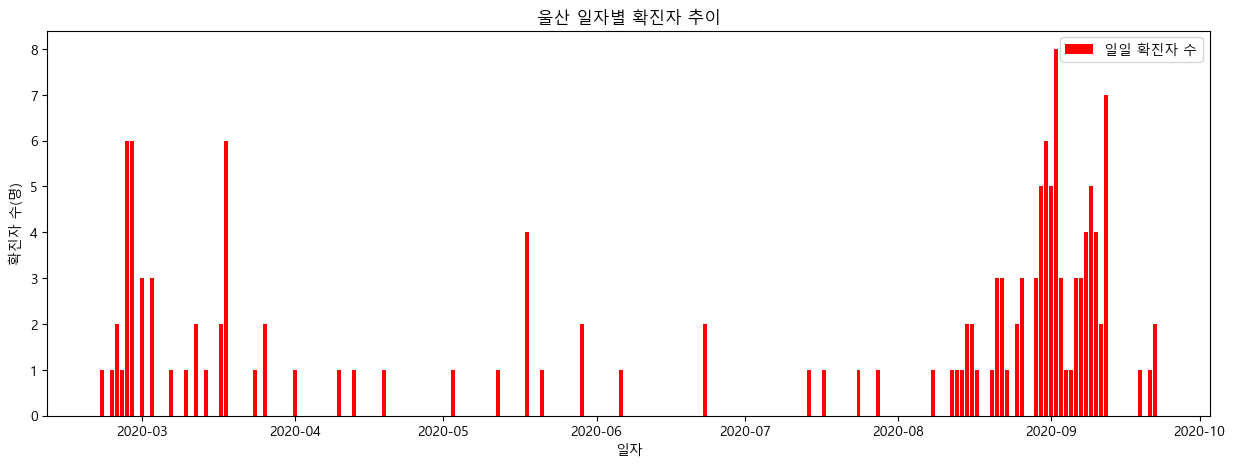

In [9]:
## 확진일에 따른 환자수 막대 그래프

plt.figure(figsize=(15,5))

plt.title('울산 일자별 확진자 추이')
plt.xlabel('일자')
plt.ylabel('확진자 수(명)')
plt.legend()
plt.show()

In [10]:
## 확진일에서 '월'만 추출한 열을 만들고 월별 확진자 수를 카운트한 시리즈 생성
df['월'] = df['확진일'].dt.month

bymonth

월
2    17
3    22
4     4
5     9
6     3
7     4
8    36
9    50
Name: count, dtype: int64

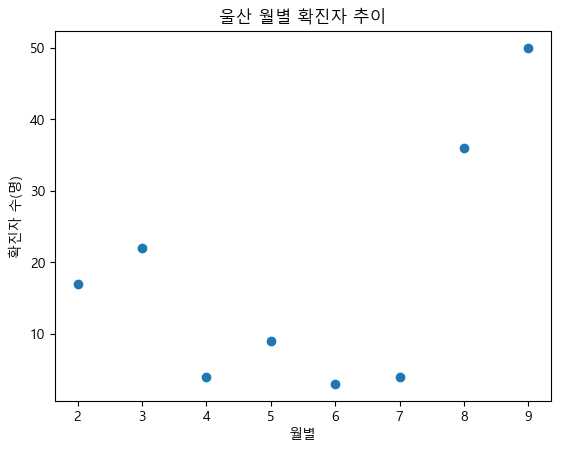

In [11]:
## 월별 확진자수를 점으로 표시 

plt.title('울산 월별 확진자 추이')
plt.xlabel('월별')
plt.ylabel('확진자 수(명)')
plt.show()

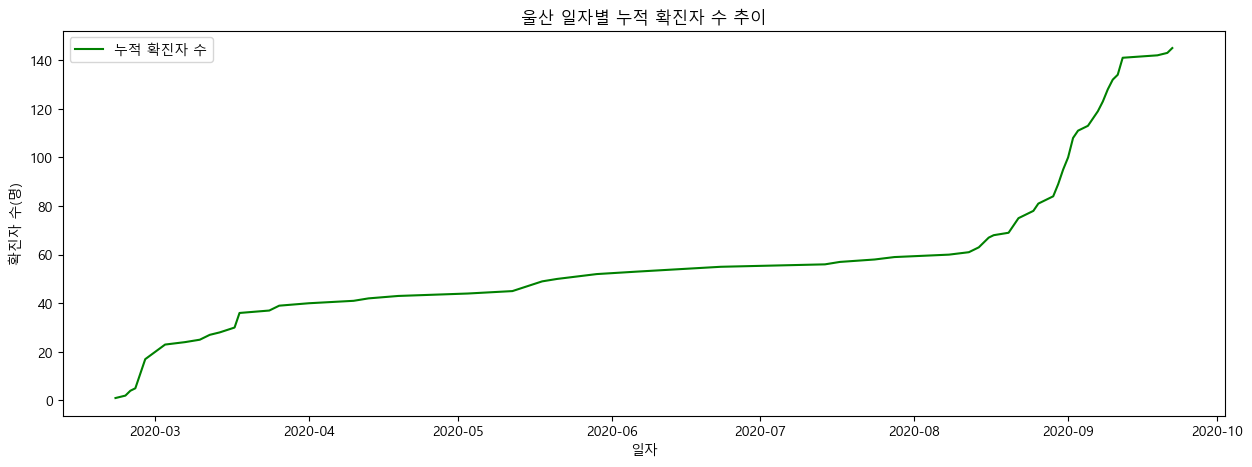

In [12]:
# 일별 누적 확진자  수
plt.figure(figsize=(15, 5))

plt.title('울산 일자별 누적 확진자 수 추이')
plt.xlabel('일자')
plt.ylabel('확진자 수(명)')
plt.legend()
plt.show()

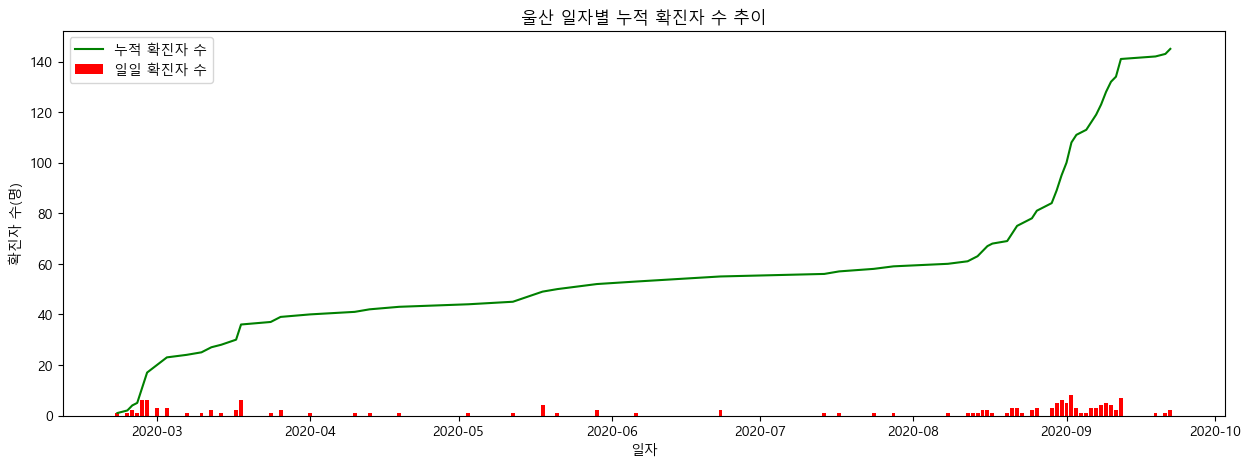

In [13]:
## 일별 확진자 막대 그래프 및 누적 선 그래프 동시 표시
plt.figure(figsize=(15, 5))

plt.title('울산 일자별 누적 확진자 수 추이')
plt.xlabel('일자')
plt.ylabel('확진자 수(명)')
plt.legend()
plt.show()

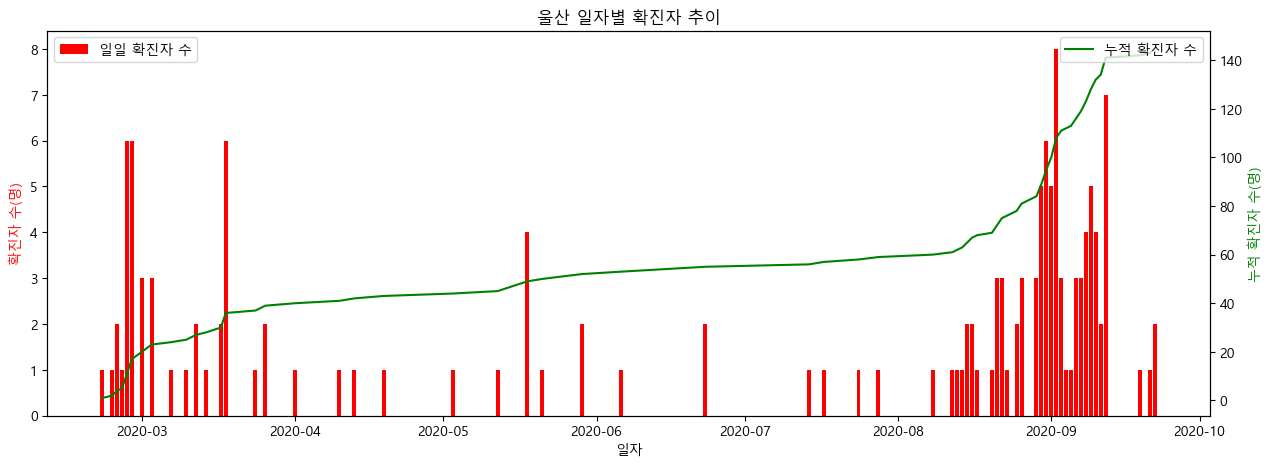

In [14]:
## 두 그래프의 축을 따로 만들고 겹쳐서 보이기 

fig, ax0 = plt.subplots(figsize=(15,5))
ax1 = ax0.twinx() ## 엑스축을 쌍둥이로 만들기 (x축 공유)
ax0.set_title("울산 일자별 확진자 추이")

ax0.set_xlabel("일자")
ax0.set_ylabel("확진자 수(명)", color='red')
ax0.legend(loc='upper left')

ax1.set_ylabel("누적 확진자 수(명)", color='green')
ax1.legend(loc='upper right')
plt.show()

In [15]:
# 구별 확진자 수 파악

byregion

거주지
남구     57
중구     28
북구     26
동구     18
울주군    16
Name: count, dtype: int64

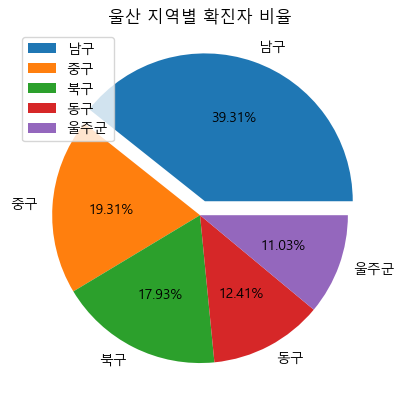

In [16]:
## 파이 그래프로 확진자 수를 소수점 2자리까지 표시한 비율로 그리기 (가장 많은 남구는 분리)

plt.title('울산 지역별 확진자 비율')
plt.legend(loc='upper left')
plt.show()

In [17]:
## 환자의 현재 상태별 분류

status

현재상태
퇴원         132
울산대학교병원     11
사망           2
Name: count, dtype: int64

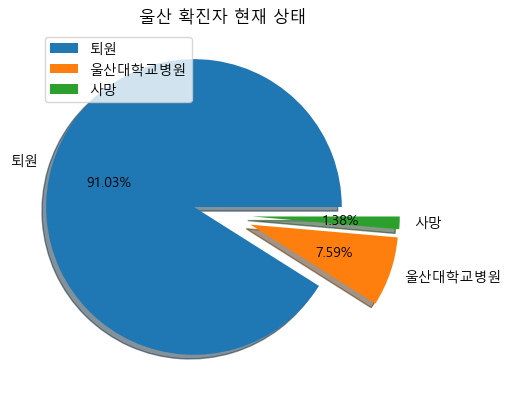

In [18]:
## 파이 그래프로 환자의 상태별 분류

plt.title('울산 확진자 현재 상태')
plt.legend(loc='upper left')
plt.show()

In [19]:
## 울산시 남구의 확진일에 따른 환자수 카운트를 위한  groupby


namgu.head()

,환자,경로,현재상태,월
확진일,,,,
2020-02-26,1,1,1,1
2020-02-27,2,2,2,2
2020-02-28,5,5,5,5
2020-03-01,1,1,1,1
2020-03-03,1,1,1,1


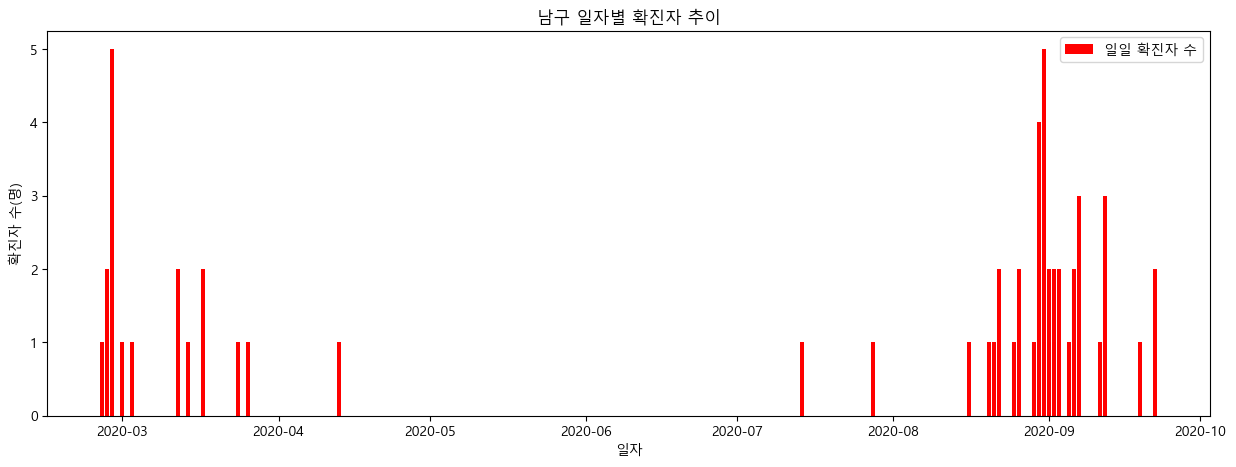

In [20]:
## 남구의 일자별 확진자수 추이






